# Plotting basics: matplotlib

Based on original notebook from [Om Salafia](https://github.com/omsharansalafia/intropython)

Refer to the [matplotlib website](https://matplotlib.org/) for a much more complete reference of classes and methods.

First, we need the import statements:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## this sets up the Matplotlib interactive windows (it is nice, but not necessary)
## and it needs the package ipympl
##%matplotlib widget

## A nice alternative is
##%matplotlib notebook

Now, we need some data to be plotted. Let us create a vector `x` and compute the graph of a function `y`, say
$$ y(x) = \left(\frac{\sin(x)}{x}\right)^{2} $$

In [3]:
x = np.linspace(0.0,10*np.pi,10000)
y = (np.sin(x)/x)**2
print(y[0:5])

[       nan 0.99999671 0.99998684 0.99997039 0.99994735]


<ipython-input-3-a514c94d601e>:2: RuntimeWarning: invalid value encountered in true_divide
  y = (np.sin(x)/x)**2


Do not worry about the runtime warning (which tells us that a division by zero took place in the creation of array `y`) and about the `nan` in the `y` array: `matplotlib` will simply ignore `nan`s without complaining. We can immediately see a graphical representation of the result by using the function `plt.plot()`, as follows:

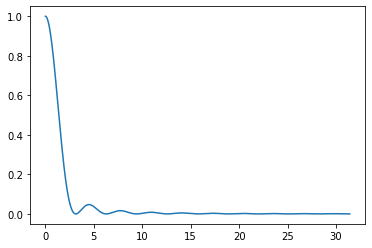

In [4]:
plt.plot(x,y)
plt.show() #this is actually only needed outside a jupyter notebook

Now, the labels in the plot are a little small. We can set the default font size by editing the `plt.rcParams` dictionary. It contains many entries which define the default behavior of `matplotlib`. The dictionary entry we want to change is `font.size`:

In [5]:
# we close the previous plot
# otherwise with the matplotlib widget or matplotlib notebook
# any new plot will be just rendered in that window
# (you do not need to do this if you are not using the widget
#  or if you are using different 'figure' objects for each plot)
# plt.close()

## Otherwise you can also just disable the matplotlib widget/notebook by using
##%matplotlib inline 

plt.rcParams['font.size']=14 # font size in points

We also want the plotted line to be thicker, and we want it red:

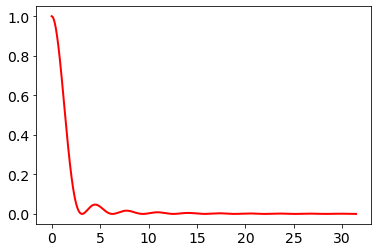

In [6]:
plt.plot(x,y,color='red',linewidth=2)
plt.show()

The *keywords* `color` and `linewidth` have corresponding shorthands, which are called `c` and `lw`:

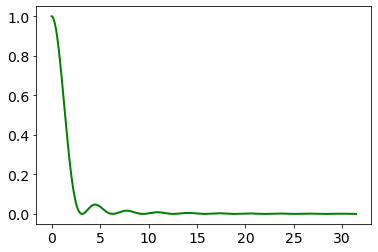

In [7]:
#plt.close()
plt.plot(x,y,c='green',lw=2)
plt.show()

Now, we want to see the vertical wiggles better, so we change the y axis scaling to log-scale, using `plt.yscale`:

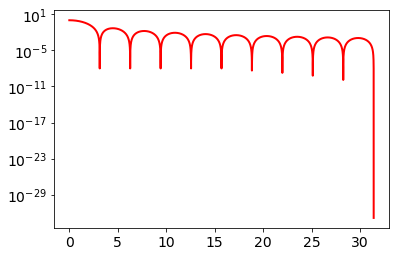

In [8]:
#plt.close()
plt.plot(x,y,c='red',lw=2)
plt.yscale('log')

To change the plot limits, we can use `plt.xlim` and `plt.ylim`. Let's zoom the vertical axis a little bit:

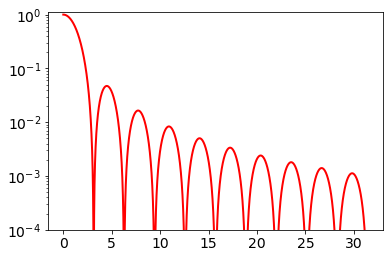

In [9]:
#plt.close()
plt.plot(x,y,c='red',lw=2)

# set the scales and limits
plt.yscale('log')
plt.ylim([1e-4,1.1])
plt.show()

Let's now add another line to the plot. We will overplot the envelope of the function, which is simply $z(x) = x^{-2}$, and we'll use a blue dashed line. Here is how to do it:

<ipython-input-10-d0b22a17f9f2>:1: RuntimeWarning: divide by zero encountered in power
  z = x**-2 # compute the envelope


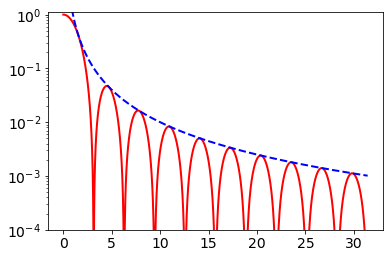

In [10]:
z = x**-2 # compute the envelope

#plt.close()
plt.plot(x,y,c='red',lw=2)
plt.plot(x,z,c='blue',lw=2,linestyle='--') # plot the blue dashed line
plt.yscale('log')
plt.ylim([1e-4,1.1])
plt.show()

Also the `linestyle` keyword has a shorthand, which is `ls`. We want now to create a legend to show the meaning of the lines. We must add a label to each line, using the `label` keyword in the plot command, and then create the legend using `plt.legend`, as follows:

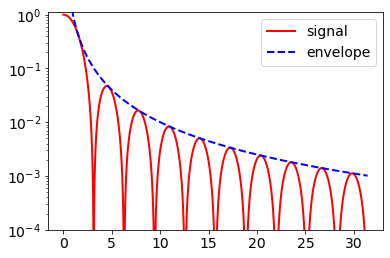

In [11]:
#plt.close()
plt.plot(x,y,c='red',lw=2,label='signal')
plt.plot(x,z,c='blue',lw=2,ls='--',label='envelope')
plt.yscale('log')
plt.ylim([1e-4,1.1])
plt.legend()

We then add axis labels using `plt.xlabel` and `plt.ylabel`. The labels can be written in $\LaTeX$ notation, provided that the $\LaTeX$ commands are enclosed within dollar (`$`) signs:

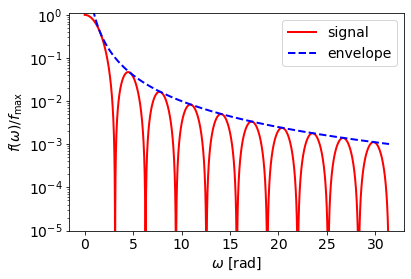

In [12]:
#plt.close()
plt.plot(x,y,c='red',lw=2,label='signal')
plt.plot(x,z,c='blue',lw=2,ls='--',label='envelope')
plt.yscale('log')
plt.ylim([1e-5,1.1])
plt.legend()
plt.xlabel('$\omega$ [rad]')
plt.ylabel('$f(\omega)/f_\mathrm{max}$')
plt.show()

To make both axes log-scale, one can use the shorthand `plt.loglog()`. This function can also be used in place of `plt.plot`, it has exactly the same notation, but it also sets both axes log-scale after creating the lines. We can also move the legend to a better location using the keyword `loc`:

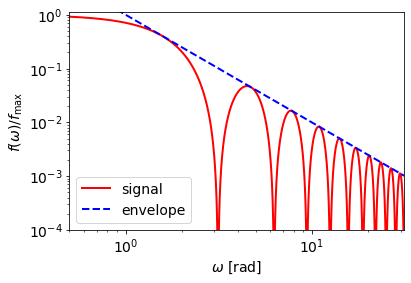

In [13]:
#plt.close()
plt.plot(x,y,c='red',lw=2,label='signal')
plt.plot(x,z,c='blue',lw=2,ls='--',label='envelope')
plt.loglog()
plt.ylim([1e-4,1.1])
plt.xlim([5e-1,10*np.pi])
plt.legend(loc='lower left')
plt.xlabel('$\omega$ [rad]')
plt.ylabel('$f(\omega)/f_\mathrm{max}$')
plt.show()

To insert an annotation (a text label at an arbitrary position in the plot), we can use the function `plt.annotate()`. We must specify the location in data coordinates using the keyword `xy`, the text as a string using the keyword `s`, and optionally the text rotation in degrees using the keyword `rotation`, as done below:

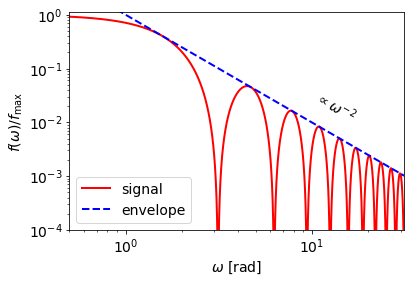

In [14]:
#plt.close()
plt.plot(x,y,c='red',lw=2,label='signal')
plt.plot(x,z,c='blue',lw=2,ls='--',label='envelope')
plt.loglog()
plt.ylim([1e-4,1.1])
plt.xlim([5e-1,10*np.pi])
plt.legend(loc='lower left')
plt.xlabel('$\omega$ [rad]')
plt.ylabel('$f(\omega)/f_\mathrm{max}$')
plt.annotate('$\propto\omega^{-2}$',xy=(10.,1e-2),rotation=-30,\
             fontsize=14)
plt.show()

The `plt.fill_between` function can be used to fill a region comprised between two curves. The two curves must be defined by two arrays y, z that refer to the same x coordinate array. The notation is quite similar to that of the `plt.plot` function. Since the result is now effectively a filled polygon, one can specify both the fill color (keyword `facecolor`) and the edge color (keyword `edgecolor`).

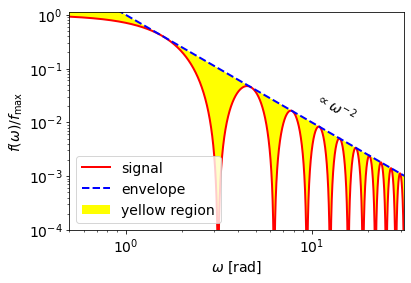

In [15]:
#plt.close()
plt.plot(x,y,c='red',lw=2,label='signal')
plt.plot(x,z,c='blue',lw=2,ls='--',label='envelope')
plt.fill_between(x,y,z,facecolor='yellow',edgecolor='None',label='yellow region')
plt.loglog()
plt.ylim([1e-4,1.1])
plt.xlim([5e-1,10*np.pi])
plt.legend(loc='lower left')
plt.xlabel('$\omega$ [rad]')
plt.ylabel('$f(\omega)/f_\mathrm{max}$')
plt.annotate(xy=(10.,1e-2),s='$\propto\omega^{-2}$',rotation=-30,fontsize=14)
plt.show()

Finally, let's remove the legend frame by setting the `frameon` kewyord to `False`:

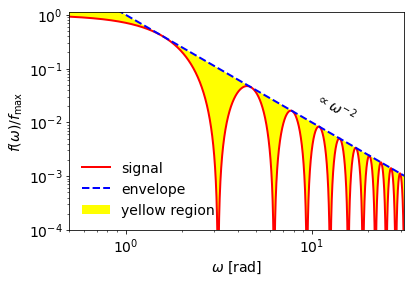

In [16]:
#plt.close()
plt.plot(x,y,c='red',lw=2,label='signal')
plt.plot(x,z,c='blue',lw=2,ls='--',label='envelope')
plt.fill_between(x,y,z,facecolor='yellow',edgecolor='None',label='yellow region')
#plt.yscale('log')
#plt.xscale('log')
plt.loglog()
plt.ylim([1e-4,1.1])
plt.xlim([5e-1,10*np.pi])
plt.legend(loc='lower left',frameon=False)
plt.xlabel('$\omega$ [rad]')
plt.ylabel('$f(\omega)/f_\mathrm{max}$')
plt.annotate(xy=(10.,1e-2),s='$\propto\omega^{-2}$',rotation=-30,fontsize=14)
plt.show()

We can now tidy everything up, to have all the commands contained in a single cell (which is then the complete code of a script that produces the plot), and let's add a command at the end to save the figure: `plt.savefig()`, with the filename as the only argument, will save the plot in the format specified by the file extension. Let's save the result in `pdf` format, that is scalable (vectorial) and can be included in PdfLaTeX documents right away:

In [17]:
plt.close()

<ipython-input-18-47dda541cb5b>:11: RuntimeWarning: invalid value encountered in true_divide
  y = (np.sin(x)/x)**2
<ipython-input-18-47dda541cb5b>:12: RuntimeWarning: divide by zero encountered in power
  z = x**-2


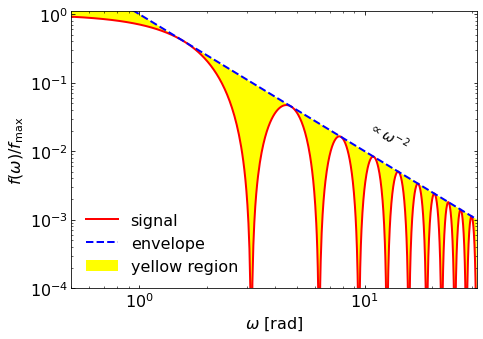

In [18]:
# import the libraries, and tweak the settings
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize']=(7,5) # inches
plt.rcParams['font.size']=16 # points
plt.rcParams['figure.autolayout']=True # to avoid the labels to fall off the figure

# first, create the data we want to plot
x = np.linspace(0.,10*np.pi,1000) 
y = (np.sin(x)/x)**2 
z = x**-2 

# plot the signal, the envelope, and the yellow region
plt.plot(x,y,c='red',lw=2,label='signal')
plt.plot(x,z,c='blue',lw=2,ls='--',label='envelope')
plt.fill_between(x,y,z,facecolor='yellow',label='yellow region')

# annotate the envelope, showing its power-law dependence
plt.annotate(xy=(10.,1e-2),s=r'$\propto\omega^{-2}$',rotation=-30,fontsize=14)

# set the axes scales log-log, and tweak the axes limits
plt.loglog()
plt.ylim([1e-4,1.1])
plt.xlim([5e-1,10*np.pi])

# label the axes
plt.xlabel(r'$\omega$ [rad]')
plt.ylabel(r'$f(\omega)/f_\mathrm{max}$')

# make better-looking tick marks
plt.tick_params(which='both',direction='in',top=True,right=True)

# make the legend
plt.legend(loc='lower left',frameon=False)

# save the figure
plt.savefig('my_figure.pdf')

## Adding a panel in a plot

Each figure can contain a number of `axes`, which is where `matplotlib` places its plots. Axes can be created by `plt.axes([l,b,w,h])`, where `[l,b,w,h]` is a list containing the left side position, bottom side position, width and height of the axes, all as fractions of the figure size:

C:\Users\bgiacoma\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


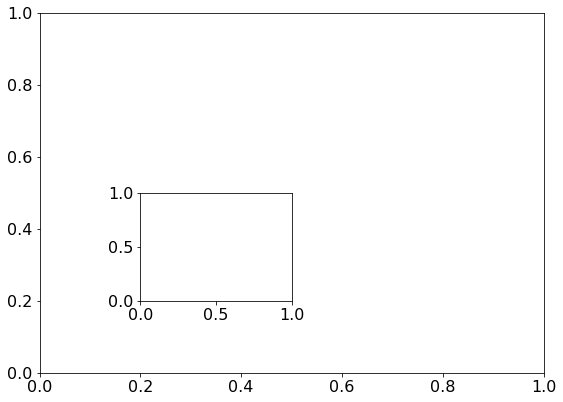

In [19]:
#plt.close()
ax1 = plt.axes([0.0,0.0,1.0,1.0])
ax2 = plt.axes([0.2,0.2,0.3,0.3])

The axes class contains many methods, such as `ax1.plot`, which can be used to put plots and other fancy matplotlib outputs within the given axes instance.

C:\Users\bgiacoma\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


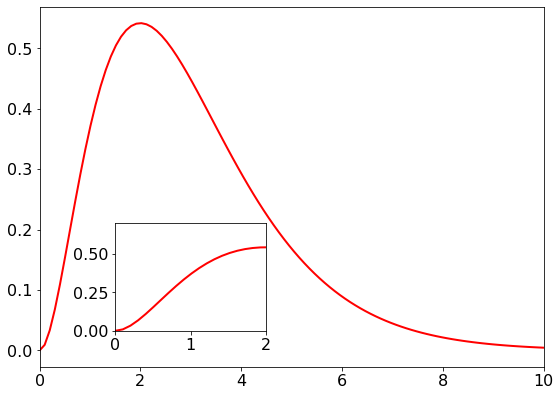

In [20]:
#plt.close()
ax1 = plt.axes([0.0,0.0,1.0,1.0])
ax2 = plt.axes([0.15,0.1,0.3,0.3])

x = np.linspace(0.,10.,100)
y = x**2*np.exp(-x) 

ax1.plot(x,y,'-r',lw=2)
ax1.set_xlim(0.,10.)

ax2.plot(x,y,'-r',lw=2)
ax2.set_xlim(0,2)
ax2.set_ylim(0,0.7)
plt.show()

C:\Users\bgiacoma\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


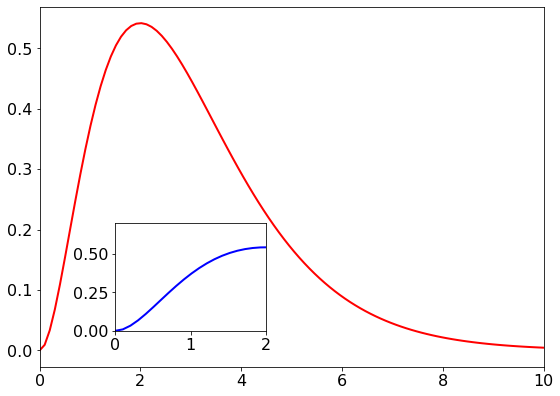

In [21]:
#plt.close()
ax1 = plt.axes([0.0,0.0,1.0,1.0]) #[xmin, ymin, xmax, ymax]
ax2 = plt.axes([0.15,0.1,0.3,0.3])

x = np.linspace(0.,10.,100)
y = x**2*np.exp(-x) 

l1 = ax1.plot(x,y,'-r',lw=2)
ax1.set_xlim(0.,10.)

l2 = ax2.plot(x,y,'-r',lw=2)
ax2.set_xlim(0,2)
ax2.set_ylim(0,0.7)

l2[0].set_color('blue')

plt.show()

In [22]:
plt.close()

## Scatter plot with histograms

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)

# some random data
xx = np.random.randn(1000)
yy = np.random.randn(1000)


def scatter_hist(x, y, ax, ax_histx, ax_histy):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    ax.scatter(x, y)

    # now determine nice limits by hand:
    binwidth = 0.25
    xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
    lim = (int(xymax/binwidth) + 1) * binwidth

    bins = np.arange(-lim, lim + binwidth, binwidth)
    ax_histx.hist(x, bins=bins)
    ax_histy.hist(y, bins=bins, orientation='horizontal')

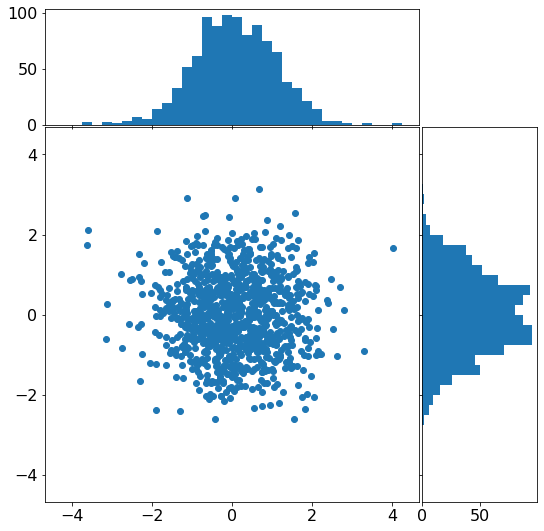

In [24]:
# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005


rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# start with a square Figure
fig = plt.figure(figsize=(8, 8))

ax = fig.add_axes(rect_scatter)
ax_histx = fig.add_axes(rect_histx, sharex=ax)
ax_histy = fig.add_axes(rect_histy, sharey=ax)

# use the previously defined function
scatter_hist(xx, yy, ax, ax_histx, ax_histy)

plt.show()